<h3>Description</h3>

<b>This notebook demonstrates the feature selection process and a comparative analysis to evaluate model performance for each feature selection</b>

<b>This notebook is made according to the next instructions:</b>

1. Feature Selection based measurement:
- divide the data to train, validation, and test sets
- train a RF model with basic hyperparameters (max_depth = 4, trees = 100) on the train set
- fit explainability method (each one separately).
- for each explainability method (SHAP, LIME, Permutation, etc.) one should extract the global explanation in the form of "feature impact" (aggregation of all local feature impact).
- apply absolute value on the global explanation results to get the feature importance for each XAI method.
- sort the list to have the order of the least to the most important features.
- start an iterative process of eliminating the least important feature in each iteration and store the evaluation on the train, validation, and test sets (train will be store for reporting) - for classification store accuracy, precision, recall, auc. regression - MSE, MAE
- programmatically chose the best set of features based on a chosen evaluation metric (accuracy/ precision/ MSE...). you can do that by applying argmax operation. iteration here = number of features to eliminate.
- visualization: 
* each line represents the test score w.r.t each evaluation metric in each iteration. 
* the arg max is the displayed red vertical line in the following figure.
* print the final score- this is the score over the test set.
- after applying the process for each XAI method you should display the test score side by side

<h3>Libraries import</h3>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from explainer_comparison.feature_eliminations import get_feature_elimination_results, add_best_feature_set, plot_feat_select_results
from explainer_comparison.constants import MODE

import matplotlib.pyplot as plt


<h3>Data preprocessing</h3>

In [2]:
# read a dataset
df = pd.read_csv('../../data/diabetes/diabetes.csv')
# df = pd.read_csv('../../data/german_credit_score/german_credit.csv')
# df = pd.read_csv('../../data/fico/train.csv')

# from sklearn.datasets import fetch_california_housing
# dataset_1 = fetch_california_housing(as_frame=True)
# X = dataset_1['data']
# y = dataset_1['target']

# random state
rs = 42

In [3]:
df.head()
# X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()
# X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# # for the fico ds fill missing values with an average value 
# for col in df.columns:
#     if df[col].isna().sum() > 0:
#         df[col].fillna(df[col].mean(), inplace=True)

In [6]:
# for diabetes
# data
X = df.iloc[:, :-1]

#target
y = df.Outcome

# for german credit score
# # data
# X = df.iloc[:, 1:]
# #target
# y = df.Creditability

In [7]:
# - divide the data to train, validation, and test sets
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.5, shuffle=False, random_state=rs)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.4, shuffle=False, random_state=rs)

X_train.shape, X_val.shape, X_test.shape

((384, 8), (230, 8), (154, 8))

<h3>Defining and training a model</h3>

In [8]:
# - train a RF model with basic hyperparameters (max_depth = 4, trees = 100) on the train set

# for diabetes, german_credit_score
model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=rs)

# # for california housing
# model = RandomForestRegressor(max_depth=4, n_estimators=100, random_state=rs)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, random_state=42)

<h3>Feature selection demonstration</h3>

In [10]:
# - fit explainability method (each one separately).

# - for each explainability method (SHAP, LIME, Permutation, etc.) one should extract the global explanation in the 
# form of "feature impact" (aggregation of all local feature impact).

# - apply absolute value on the global explanation results to get the feature importance for each XAI method.

# - sort the list to have the order of the least to the most important features.

# - start an iterative process of eliminating the least important feature in each iteration 
# and store the evaluation on the train, validation, and test sets (train will be store for reporting) - 
# for classification store accuracy, precision, recall, auc. regression - MSE, MAE

# choose mode: regression or classification

mode = MODE.CLASSIFICATION

# for california housing ds
# mode = MODE.REGRESSION

list_explainers = ['shap', 'lime', 'permutation_new', 'ebm'] # 'permutation', 

results_dict = get_feature_elimination_results(list_explainers, model, X_train, y_train, X_val, y_val, X_test, y_test,\
                                                            mode, threshold=0.3, random_state=rs, verbose=False)


SHAP


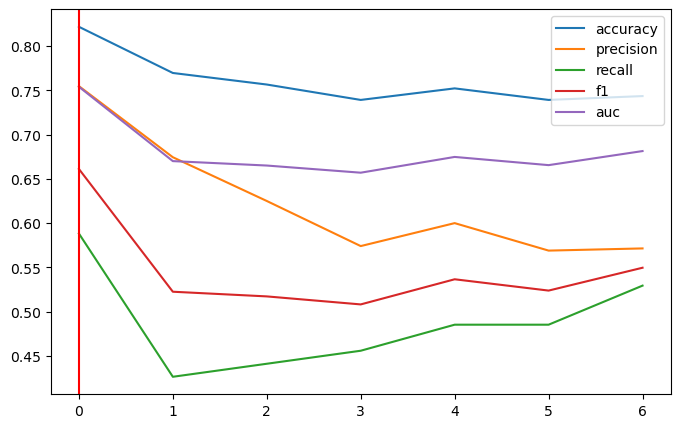

0 features are suggested to be removed
              train       val      test
accuracy   0.830729  0.821739  0.779221
precision  0.857143  0.754717  0.756098
recall     0.662069  0.588235  0.563636
f1         0.747082  0.661157  0.645833
auc        0.797562  0.753994  0.731313

LIME


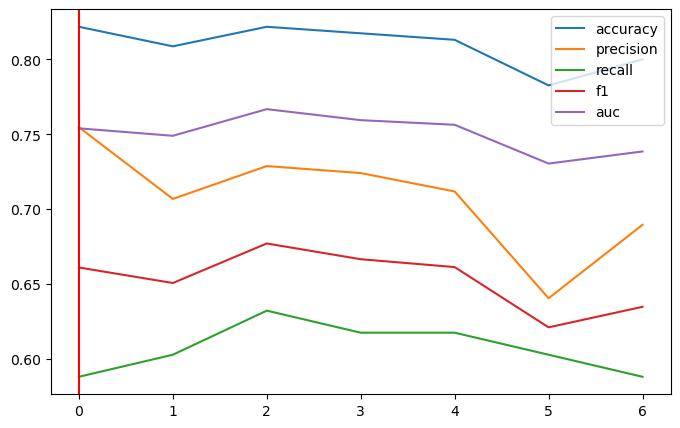

0 features are suggested to be removed
              train       val      test
accuracy   0.830729  0.821739  0.779221
precision  0.857143  0.754717  0.756098
recall     0.662069  0.588235  0.563636
f1         0.747082  0.661157  0.645833
auc        0.797562  0.753994  0.731313

PERMUTATION_NEW


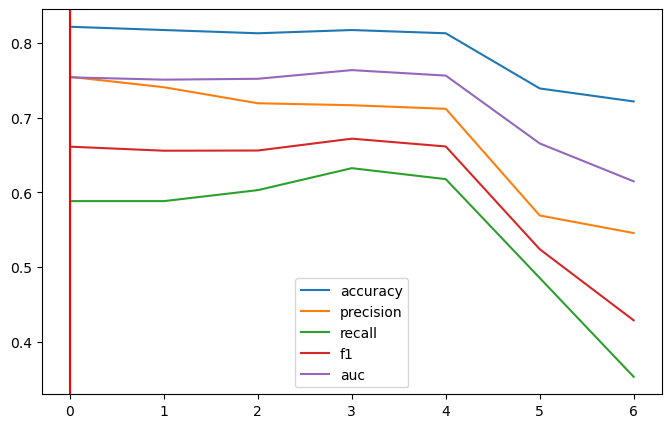

0 features are suggested to be removed
              train       val      test
accuracy   0.830729  0.821739  0.779221
precision  0.857143  0.754717  0.756098
recall     0.662069  0.588235  0.563636
f1         0.747082  0.661157  0.645833
auc        0.797562  0.753994  0.731313

EBM


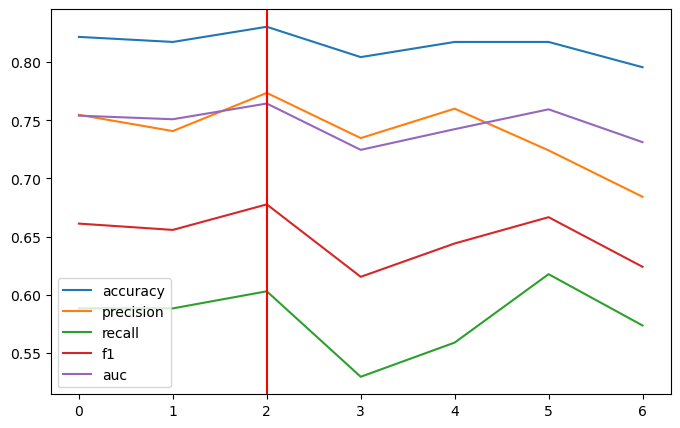

2 features are suggested to be removed
              train       val      test
accuracy   0.820312  0.830435  0.753247
precision  0.827586  0.773585  0.717949
recall     0.662069  0.602941  0.509091
f1         0.735632  0.677686  0.595745
auc        0.789193  0.764434  0.698990



In [11]:
# programmatically chose the best set of features based on a chosen evaluation metric (accuracy/ precision/ MSE...). 
# you can do that by applying argmax operation. iteration here = number of features to eliminate.

# - visualization: 
# * each line represents the test score w.r.t each evaluation metric in each iteration. 
# * the arg max is the displayed red vertical line in the following figure.

results_dict_upd = add_best_feature_set(results_dict, mode)

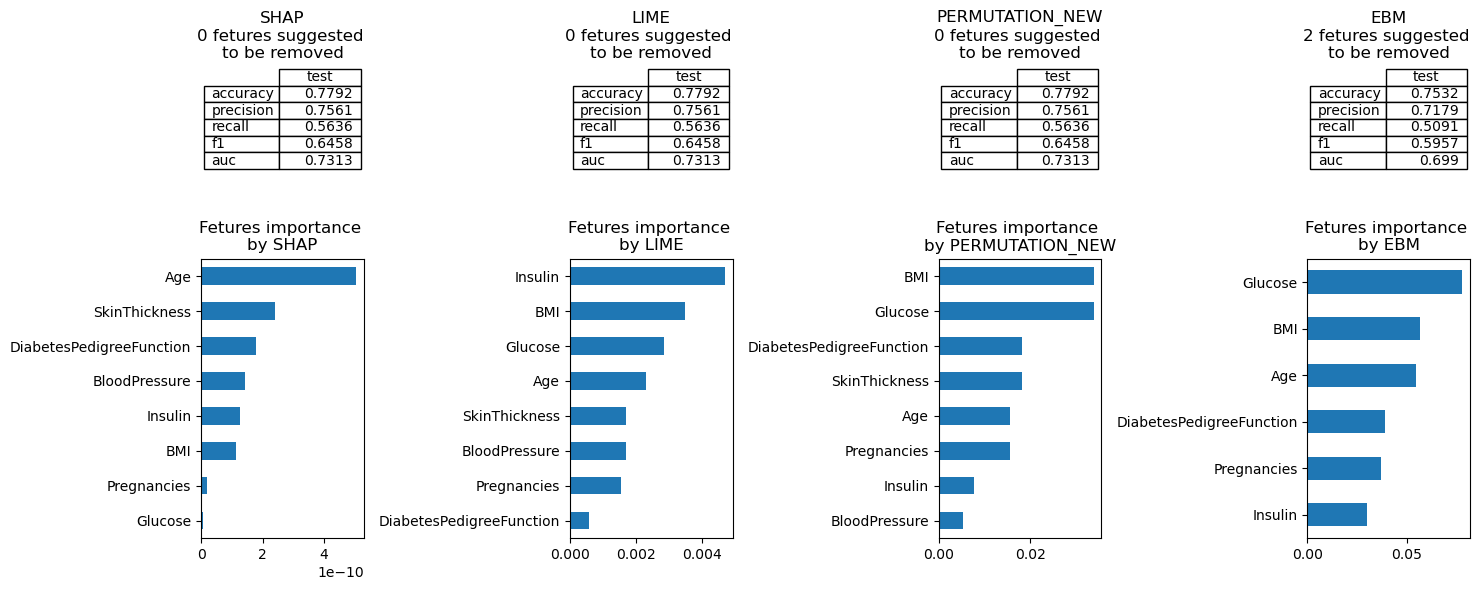

In [12]:
# * print the final score- this is the score over the test set.
# - after applying the process for each XAI method you should display the test score side by side

plot_feat_select_results(results_dict_upd)